# CS 6140 Final Project

Fall 2022

Group 8

# Multilayer Perceptron Regression Model

## Setup

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

## Import Data from CSV

In [72]:
BASE_PATH = '../data'
POP_DATA_DF_FILE_NAME = 'pop_data_df'
POP_ENV_DATA_DF_FILE_NAME = 'pop_env_data_df'
EXTENSION = '.csv'

In [73]:
pop_data_train_X = pd.read_csv(f'{BASE_PATH}/{POP_DATA_DF_FILE_NAME}_train_X{EXTENSION}', index_col=0)
pop_data_train_Y = pd.read_csv(f'{BASE_PATH}/{POP_DATA_DF_FILE_NAME}_train_Y{EXTENSION}', index_col=0)
pop_data_test_X = pd.read_csv(f'{BASE_PATH}/{POP_DATA_DF_FILE_NAME}_test_X{EXTENSION}', index_col=0)
pop_data_test_Y = pd.read_csv(f'{BASE_PATH}/{POP_DATA_DF_FILE_NAME}_test_Y{EXTENSION}', index_col=0)

In [74]:
pop_data_train_X.head()

,POP_DENS,POP 0-14,POP 15-29,POP 30-44,POP 45-59,POP_GROWTH,HOUSEHOLDS,DWELLINGS
CODE_NUTS3,,,,,,,,
UKD33,4778.0,106168.0,169423.0,123404.0,82110.0,6.0,234751,226986
UKI74,3372.0,113739.0,106660.0,126581.0,105063.0,4.0,209295,202070
DE21F,116.0,13684.0,15669.0,17515.0,24401.0,4.0,49170,50795
DE21G,144.0,16220.0,20210.0,20988.0,27603.0,6.0,51506,50667
UKC23,2021.0,46434.0,52562.0,48995.0,58993.0,1.0,126170,128789


In [75]:
pop_env_data_train_X = pd.read_csv(f'{BASE_PATH}/{POP_ENV_DATA_DF_FILE_NAME}_train_X{EXTENSION}', index_col=0)
pop_env_data_train_Y = pd.read_csv(f'{BASE_PATH}/{POP_ENV_DATA_DF_FILE_NAME}_train_Y{EXTENSION}', index_col=0)
pop_env_data_test_X = pd.read_csv(f'{BASE_PATH}/{POP_ENV_DATA_DF_FILE_NAME}_test_X{EXTENSION}', index_col=0)
pop_env_data_test_Y = pd.read_csv(f'{BASE_PATH}/{POP_ENV_DATA_DF_FILE_NAME}_test_Y{EXTENSION}', index_col=0)

In [76]:
pop_env_data_train_X.head()

,POP_DENS,POP 0-14,POP 15-29,POP 30-44,POP 45-59,POP_GROWTH,HOUSEHOLDS,DWELLINGS,SURFACE AREA,NTL_avg,NO2_avg,WIND_Avg,Temp_mean_over12yrs,PRESSURE_avg,PRECIPITATION,SOLAR_RAD_avg,LAI_avg
CODE_NUTS3,,,,,,,,,,,,,,,,,
UKD33,4778.0,106168.0,169423.0,123404.0,82110.0,6.0,234751,226986,114.15,63.000000,5.585338,3.747743,9.953530,0.970338,70.400078,9287.124356,1.365212
UKI74,3372.0,113739.0,106660.0,126581.0,105063.0,4.0,209295,202070,164.04,62.611111,5.838824,4.022762,10.483912,0.995814,52.331597,9711.670648,1.676107
DE21F,116.0,13684.0,15669.0,17515.0,24401.0,4.0,49170,50795,857.98,10.228535,2.574793,2.613219,7.298616,0.796922,109.000675,11463.416494,2.555620
DE21G,144.0,16220.0,20210.0,20988.0,27603.0,6.0,51506,50667,797.05,10.397917,2.833501,2.396661,8.284346,0.911123,76.906713,11003.100022,2.670005
UKC23,2021.0,46434.0,52562.0,48995.0,58993.0,1.0,126170,128789,136.64,58.305557,3.644446,5.385735,9.080700,0.959126,54.822049,9251.519674,1.202203


## Implement Model

### Population Data Model

In [57]:
OUTPUT_COLS = ['COVID_Mortality_R']

NUM_MAX_ITERATIONS = 10000

TEST_SIZE = 0.33
NUM_CROSS_VALIDATIONS = 10

In [58]:
train_X = pop_data_train_X
train_Y = pop_data_train_Y
test_X = pop_data_test_X
test_Y = pop_data_test_Y

In [59]:
mlp_regressor = MLPRegressor(max_iter=NUM_MAX_ITERATIONS)

In [60]:
param_options = {
    'hidden_layer_sizes': [
        (2), (2, 2), (2, 2, 2), (2, 2, 2, 2), (2, 2, 2, 2, 2), 
        (3), (3, 3), (3, 3, 3), (3, 3, 3, 3), (3, 3, 3, 3, 3),
        (5), (5, 5), (5, 5, 5), (5, 5, 5, 5), (5, 5, 5, 5, 5),
        (10), (10, 10), (10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10),
        (20), (20, 20), (20, 20, 20), (20, 20, 20, 20), (20, 20, 20, 20, 20)
    ]
}

In [61]:
mlp_regressor.fit(train_X, train_Y.values.ravel())

MLPRegressor(max_iter=10000)

In [ ]:
mlp_grid_cross_validation = GridSearchCV(mlp_regressor, param_options, refit=True, cv=NUM_CROSS_VALIDATIONS).fit(train_X, train_Y.values.ravel())
best_mlp_regressor = mlp_grid_cross_validation.best_estimator_
best_mlp_regressor.fit(train_X, train_Y)

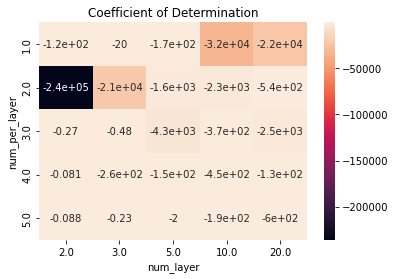

In [69]:
results_hash = mlp_grid_cross_validation.cv_results_
results_stats_df = pd.DataFrame(columns=['num_per_layer', 'num_layer', 'score'])

for param_set, mean_score in zip(results_hash['params'], results_hash['mean_test_score']):
    if type(param_set['hidden_layer_sizes']) is int:
        results_stats_df.loc[len(results_stats_df.index)] = [1, param_set['hidden_layer_sizes'], mean_score]
    else:
        results_stats_df.loc[len(results_stats_df.index)] = [len(param_set['hidden_layer_sizes']), param_set['hidden_layer_sizes'][0], mean_score]

results_stats_df = results_stats_df.pivot("num_per_layer", "num_layer", "score")

ax = plt.axes()
ax = sns.heatmap(results_stats_df, annot=True)
ax.set_title('Coefficient of Determination')
plt.show()

In [68]:
print(f'The best loss is: {best_mlp_regressor.best_loss_}')

The best loss is: 609.7227035968459


In [70]:
print(f'The coefficient of determination is: {np.format_float_scientific(best_mlp_regressor.score(test_X, test_Y))}')

The coefficient of determination is: -4.2941876619472175e-01


### Population and Environment Data Model

In [77]:
OUTPUT_COLS = ['COVID_Mortality_R']

NUM_MAX_ITERATIONS = 10000

TEST_SIZE = 0.33
NUM_CROSS_VALIDATIONS = 10

In [78]:
train_X = pop_env_data_train_X
train_Y = pop_env_data_train_Y
test_X = pop_env_data_test_X
test_Y = pop_env_data_test_Y

In [79]:
mlp_regressor = MLPRegressor(max_iter=NUM_MAX_ITERATIONS)

In [80]:
param_options = {
    'hidden_layer_sizes': [
        (2), (2, 2), (2, 2, 2), (2, 2, 2, 2), (2, 2, 2, 2, 2), 
        (3), (3, 3), (3, 3, 3), (3, 3, 3, 3), (3, 3, 3, 3, 3),
        (5), (5, 5), (5, 5, 5), (5, 5, 5, 5), (5, 5, 5, 5, 5),
        (10), (10, 10), (10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10),
        (20), (20, 20), (20, 20, 20), (20, 20, 20, 20), (20, 20, 20, 20, 20)
    ]
}

In [81]:
mlp_regressor.fit(train_X, train_Y.values.ravel())

MLPRegressor(max_iter=10000)

In [ ]:
mlp_grid_cross_validation = GridSearchCV(mlp_regressor, param_options, refit=True, cv=NUM_CROSS_VALIDATIONS).fit(train_X, train_Y.values.ravel())
best_mlp_regressor = mlp_grid_cross_validation.best_estimator_
best_mlp_regressor.fit(train_X, train_Y)

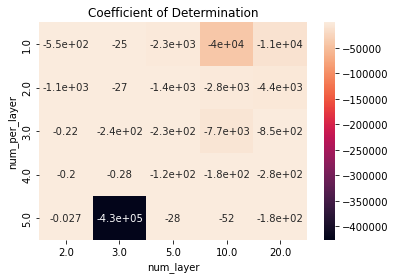

In [83]:
results_hash = mlp_grid_cross_validation.cv_results_
results_stats_df = pd.DataFrame(columns=['num_per_layer', 'num_layer', 'score'])

for param_set, mean_score in zip(results_hash['params'], results_hash['mean_test_score']):
    if type(param_set['hidden_layer_sizes']) is int:
        results_stats_df.loc[len(results_stats_df.index)] = [1, param_set['hidden_layer_sizes'], mean_score]
    else:
        results_stats_df.loc[len(results_stats_df.index)] = [len(param_set['hidden_layer_sizes']), param_set['hidden_layer_sizes'][0], mean_score]

results_stats_df = results_stats_df.pivot("num_per_layer", "num_layer", "score")

ax = plt.axes()
ax = sns.heatmap(results_stats_df, annot=True)
ax.set_title('Coefficient of Determination')
plt.show()

In [84]:
print(f'The best loss is: {best_mlp_regressor.best_loss_}')

The best loss is: 470.08860339418385


In [85]:
print(f'The coefficient of determination is: {np.format_float_scientific(best_mlp_regressor.score(test_X, test_Y))}')

The coefficient of determination is: -1.2691526427310862e-04
